**/1. prepare/**

Testing Project
- https://www.kaggle.com/aleks12345/world-hapiness-report/data
- Word Happiness Report (2015\2016\2017)

Data Dict:
1. Country - Name of the country
1. Region - Region the country belongs to
1. Happiness Rank - Rank of the country based on the Happiness Score.
1. Happiness Score - A metric measured in 2016 by asking the sampled people the question: "How would you rate your happiness on a scale of 0 to 10 where 10 is the happiest"
1. Lower Confidence Interval - Lower Confidence Interval of the Happiness Score
1. Upper Confidence Interval - Upper Confidence Interval of the Happiness Score
1. Economy (GDP per Capita) - The extent to which GDP contributes to the calculation of the Happiness Score.
1. Family - The extent to which Family contributes to the calculation of the Happiness Score
1. Health (Life Expectancy) - The extent to which Life expectancy contributed to the calculation of the Happiness Score
1. Freedom - The extent to which Freedom contributed to the calculation of the Happiness Score
1. Trust (Government Corruption) - The extent to which Perception of Corruption contributes to Happiness Score
1. Generosity - The extent to which Generosity contributed to the calculation of the Happiness Score
1. Dystopia Residual - The extent to which Dystopia Residual contributed to the calculation of the Happiness Score.

Contect Brief:
- Dystopia 是一个虚拟的最低分国家，为了比较和保证其他国家值都为正设立

**/2.data inspect/**

In [245]:
import pandas as pd
import numpy as np

import matplotlib as plt
#import seaborn as sns

%matplotlib inline
# 遇到问题升级conda update ipython
# deactive，active 环境

filelist = ['2015.csv', '2016.csv', '2017.csv']

'''
# 后续增加比较通用的 办法
for i in filelist:
    df = pd.read_csv(i)
    #print(df)

df.shape
'''

df2015 = pd.read_csv('2015.csv')
df2016 = pd.read_csv('2016.csv')
df2017 = pd.read_csv('2017.csv')

In [246]:
df2015.head(3)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204


In [247]:
df2015.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [248]:
df2016.head(3)

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137


In [249]:
df2016.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

In [250]:
df2017.head(3)

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715


In [251]:
df2017.columns

Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')

In [252]:
# 经过观察2015的数据和2016及2017的有不同
# 不同的地方在标准差和置信区间
# 3年数据并不多，所以去掉不一致的列

df2015 = df2015.drop('Standard Error', axis = 1)
df2016 = df2016.drop(['Lower Confidence Interval', 'Upper Confidence Interval'], axis = 1)
df2017 = df2017.drop(['Lower Confidence Interval', 'Upper Confidence Interval'], axis = 1)

KeyError: "['Lower Confidence Interval' 'Upper Confidence Interval'] not found in axis"

In [253]:
print(df2015.columns == df2016.columns)
print(df2016.columns == df2016.columns)

[ True  True  True  True  True  True  True  True  True  True  True]
[ True  True  True  True  True  True  True  True  True  True  True]


In [254]:
df2017.tail(3)

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
152,Tanzania,153,3.349,3.461430,3.236570,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130
153,Burundi,154,2.905,3.074690,2.735310,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024
154,Central African Republic,155,2.693,2.864884,2.521116,0.000000,0.000000,0.018773,0.270842,0.280876,0.056565,2.066005


In [255]:
df2015.shape

(158, 11)

In [256]:
df2016.shape

(157, 11)

In [257]:
df2017.shape
# 3个shape相差不多，先不处理了

(155, 12)

In [258]:
type(df2015.describe())

pandas.core.frame.DataFrame

In [259]:
c2015 = df2015.Country
c2016 = df2016.Country
c2017 = df2017.Country
print(c2015[:3])
print(c2016[:3])

0    Switzerland
1        Iceland
2        Denmark
Name: Country, dtype: object
0        Denmark
1    Switzerland
2        Iceland
Name: Country, dtype: object


In [260]:
d2015 = []
for i in c2015:
    # 使用 in 要转换为list
    if i not in list(c2016) or i not in list(c2017):
        d2015.append(i)
        
d2016 = []
for i in c2016:
    if i not in list(c2015) or i not in list(c2017):
        d2016.append(i)
        
d2017 = []
for i in c2017:
    if i not in list(c2015) or i not in list(c2016):
        d2017.append(i)
        
d2015, d2016, d2017

(['Oman',
  'Taiwan',
  'Suriname',
  'Hong Kong',
  'Somaliland region',
  'Mozambique',
  'Lesotho',
  'Laos',
  'Swaziland',
  'Djibouti',
  'Comoros',
  'Central African Republic'],
 ['Puerto Rico',
  'Taiwan',
  'Suriname',
  'Belize',
  'Hong Kong',
  'Somalia',
  'Somaliland Region',
  'Laos',
  'Namibia',
  'Comoros',
  'South Sudan'],
 ['Taiwan Province of China',
  'Belize',
  'Hong Kong S.A.R., China',
  'Somalia',
  'Namibia',
  'Mozambique',
  'Lesotho',
  'South Sudan',
  'Central African Republic'])

In [261]:
def deleterow(df, dlist, colname):
    for i in dlist:
        df.drop(df.loc[df[colname]==i].index, inplace=True)
    print(df.shape)
    
deleterow(df2015, d2015, 'Country')
deleterow(df2016, d2016, 'Country')
deleterow(df2017, d2017, 'Country')

(146, 11)
(146, 11)
(146, 12)


In [262]:
df2015.head(3)

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204


In [263]:
df2016.head(3)

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137


In [264]:
df2017.head(3)

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715


In [265]:
df3 = pd.DataFrame(columns=['2015','2016','2017'])
df3['2015'] = df2015.iloc[:,3].copy()
df3['2016'] = df2016.iloc[:,3].copy()
df3['2017'] = df2017.iloc[:,3].copy()
print(df3.shape)
df3.head()

(146, 3)


,2015,2016,2017
0,7.587,7.526,7.594445
1,7.561,7.509,7.581728
2,7.527,7.501,7.622030
3,7.522,7.498,7.561772
4,7.427,7.413,7.527542


**/3.question/**

检查下3年来，世界人民的幸福程度是不是有了提高（忧国忧民如我，正点）

**/4.answer/**

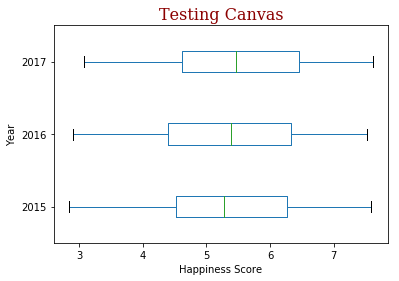

In [273]:
# box可以指定位置和横竖的比如：
# df3.plot.box(vert=False, positions=[1,4,5])
ax = df3.plot.box(vert=False)

font = {'family' : 'serif',
        'color'  : 'darkred',
        'weight' : 'normal',
        'size'   : 16,
        }

ax.set_xlabel('Happiness Score')
ax.set_ylabel('Year')

ax.set_title('Testing Canvas', fontdict = font);

In [274]:
df3.describe()

,2015,2016,2017
count,146.00000,136.000000,134.000000
mean,5.39589,5.408044,5.515891
std,1.15973,1.165396,1.122144
min,2.83900,2.905000,3.074690
25%,4.52600,4.401750,4.616703
50%,5.27700,5.395000,5.469990
75%,6.26325,6.333250,6.450057
max,7.58700,7.526000,7.622030


**/5.conclusion/**

In [ ]:
1. 从3年的数值来看，幸福指数总体在上升（只保留了3年都有评的国家，影响需再评估）
2. 箱体在2016年下限负向移动，并非好的现象，不过其他所有值都是正向移动
3. 只有3年数据比较少
4. 应该是搞了2小时，先到此暂停